## DB scan Algorithm

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_moons ## generate dataset
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
X , y_true = make_moons(n_samples = 500 , noise = 0.05 , random_state = 42)

In [11]:
X

array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523],
       [ 1.25490304, -0.48343549],
       [ 1.05385133, -0.44269047],
       [ 0.03137971,  1.05301203],
       [ 0.62054473,  0.71309598],
       [ 1.7876566 , -0.14295878],
       [ 0.99907493,  0.09180641],
       [-0.70723041,  0.57499903],
       [ 1.46479643, -0.47111862],
       [ 0.42712245,  0.83103216],
       [ 1.05341942, -0.50102941],
       [ 1.19597671, -0.49472393],
       [ 1.99422286,  0.42426007],
       [ 0.93175527,  0.39426183],
       [ 0.41104275, -0.33348189],
       [ 1.49073255, -0.38560138],
       [ 1.97517181,  0.35930615],
       [ 2.0470942 ,  0.41068552],
       [-0.00592133,  0.14862165],
       [ 0.82592072, -0.42998975],
       [ 0.54309448,  0.75144817],
       [ 1.8709548 ,  0.20141701],
       [ 1.9224317 ,  0.43263225],
       [-0.86765136,  0.45505598],
       [ 0.28216036,

In [12]:
df = pd.DataFrame( X , columns = ['feature_1' , 'feature_2'])
df

,feature_1,feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [13]:
sc= StandardScaler()
X_scaled = sc.fit_transform(X)

In [14]:
X_scaled

array([[ 3.75124610e-01, -1.40367864e+00],
       [ 2.26814579e-01,  1.13562771e+00],
       [ 5.95441542e-01, -1.49371022e+00],
       [-9.44918355e-01,  1.40974769e+00],
       [-2.43115122e-01,  1.61806199e+00],
       [ 8.63307743e-01, -1.47536691e+00],
       [ 6.31994868e-01, -1.39355455e+00],
       [-5.44373389e-01,  1.60968258e+00],
       [ 1.33469407e-01,  9.27161489e-01],
       [ 1.47624835e+00, -7.91720052e-01],
       [ 5.68973828e-01, -3.20332517e-01],
       [-1.39415493e+00,  6.49875138e-01],
       [ 1.10479310e+00, -1.45063573e+00],
       [-8.90656986e-02,  1.16396681e+00],
       [ 6.31497948e-01, -1.51069392e+00],
       [ 7.95512152e-01, -1.49803307e+00],
       [ 1.71390580e+00,  3.47204752e-01],
       [ 4.91521597e-01,  2.86970964e-01],
       [-1.07565622e-01, -1.17427347e+00],
       [ 1.13463298e+00, -1.27892474e+00],
       [ 1.69198729e+00,  2.16783084e-01],
       [ 1.77473503e+00,  3.19948276e-01],
       [-5.87288774e-01, -2.06252585e-01],
       [ 3.

In [15]:
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [16]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='feature_1', ylabel='feature_2'>

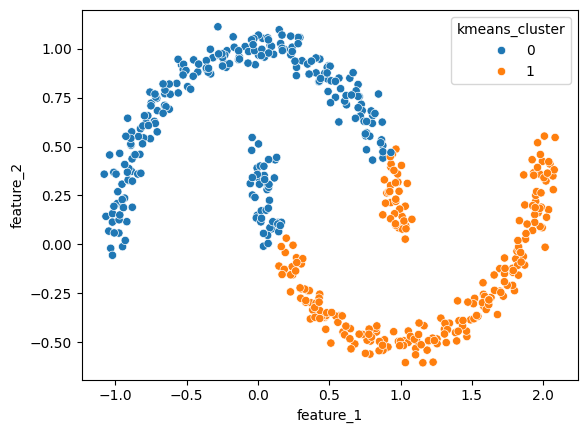

In [17]:
sns.scatterplot(x = df['feature_1'],
                y = df['feature_2'],
                hue = df['kmeans_cluster'],
                palette='tab10')

### this is the problem that occurs due to non circular data

### Nom applying ``` DB Scan ```

In [18]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [19]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='feature_1', ylabel='feature_2'>

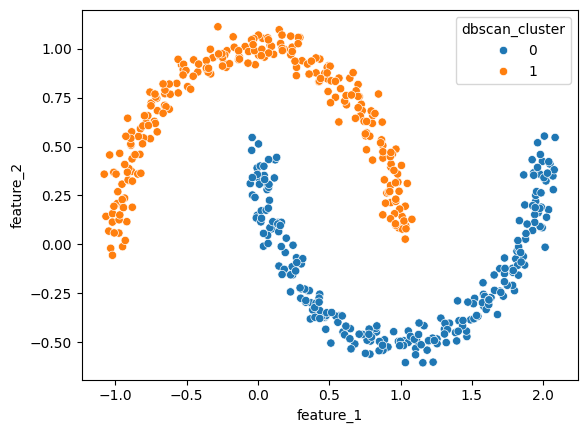

In [21]:
sns.scatterplot(x = df['feature_1'] ,
                y=df['feature_2'] ,
                hue=df['dbscan_cluster'],
                palette='tab10')